In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import math
import matplotlib.pyplot as plt
from scipy import stats

In [75]:
#import geopandas as gpd
#df_osm = gpd.read_file(r'../../data/raw/Shrewsbury/edges.shp')

In [76]:
with open(r'../../data/tidy/Shrewsbury_join_tidy_CLAY.csv') as Shrewsbury_clay:
    df_Shrewsbury_clay=pd.read_csv(Shrewsbury_clay)

C:\Users\Mahsa\Anaconda3\envs\oxe\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (24,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [47]:
df_Shrewsbury_clay['FULL_STR'].sort_values().unique()

array(['ABBY LN', 'ACORN ST', 'ADAMS FARM RD', 'ADAMS RD', 'ADIN DR',
       'AFRA DR', 'ALDEN AVE', 'ALICE AVE', 'ALMONDWOOD CIR',
       'ALTHEA PATH', 'AMBERLY LN', 'AMHERST RD', 'ANGELA AVE',
       'ANGLIN LN', 'APPALOOSA DR', 'APPLE SEED DR', 'APPLEWOOD CIR',
       'ARBOR CIR', 'ARBOR DR', 'ARCH ST', 'ARCTURUS DR', 'ARGILA LN',
       'ARNOLD RD', 'ARROWWOOD DR', 'ARTEMAS AVE', 'ASHLEY DR',
       'ASHMONT ST', 'ASHTON DR', 'ASHWOOD CIR', 'ASPEN RD', 'ATWOOD LN',
       'AUDUBON DR', 'AVALON WAY', 'AVON AVE', 'AVON DR', 'BAGLEY AVE',
       'BAILEY RD', 'BAKER AVE', 'BALDWIN CIR', 'BALSAM CIR',
       'BANNISTER ST', 'BARNARD ST', 'BARROWS RD', 'BAY RD',
       'BAY VIEW DR', 'BAYBERRY CIR', 'BEACH ISLAND', 'BEACH RD',
       'BEACON ST', 'BEAVER DR', 'BECKET ST', 'BELLINGHAM WAY',
       'BELLRIDGE DR', 'BENJAMIN LN', 'BENTON ST', 'BERKSHIRE RD',
       'BETHS RD', 'BEVERLY HILL DR', 'BEVERLY RD', 'BIRCH BRUSH RD',
       'BIRCH LN', 'BIRCHWOOD DR', 'BITTERSWEET CIR', 'BLACKSTO

In [38]:
len(df_Shrewsbury_clay['FULL_STR'].unique())

690

In [55]:
df_Shrewsbury_clay.columns

Index(['fid', 'MAP_PAR_ID', 'LOC_ID', 'POLY_TYPE', 'MAP_NO', 'SOURCE',
       'PLAN_ID', 'LAST_EDIT', 'BND_CHK', 'NO_MATCH', 'TOWN_ID', 'PROP_ID',
       'BLDG_VAL', 'LAND_VAL', 'OTHER_VAL', 'TOTAL_VAL', 'FY', 'LOT_SIZE',
       'LS_DATE', 'LS_PRICE', 'USE_CODE', 'SITE_ADDR', 'ADDR_NUM', 'FULL_STR',
       'LOCATION', 'CITY', 'ZIP', 'OWNER1', 'OWN_ADDR', 'OWN_CITY',
       'OWN_STATE', 'OWN_ZIP', 'OWN_CO', 'LS_BOOK', 'LS_PAGE', 'REG_ID',
       'ZONING', 'YEAR_BUILT', 'BLD_AREA', 'UNITS', 'RES_AREA', 'STYLE',
       'NUM_ROOMS', 'LOT_UNITS', 'STORIES', 'SHAPE_AREA', 'SHAPE_LEN',
       'AREASYMBOL', 'SPATIALVER', 'MUSYM', 'MUKEY', 'SS_AREA', 'MUSYM_AREA',
       'SLOPE', 'AREANAME', 'MUNAME', 'COMPNAME', 'MUKIND', 'FRMLNDCLS',
       'HYDRCRATNG', 'DRAINCLASS', 'MINSURFTEX', 'TFACTOR', 'AWS100', 'AWS25',
       'DEP2WATTBL', 'DWELLWB', 'HYDROLGRP', 'NIRRLCC', 'ROADS', 'SEPTANKAF',
       'SLOPE_1', 'FLOODING', 'PONDING', 'CORCONCRET', 'TAXCLNAME',
       'CM2RESLYR', 'RESKIND', 'PARMAT

In [60]:
clay=[]
for i in df_Shrewsbury_clay['FULL_STR'].unique():
    #df_current['clay']=df_Shrewsbury_clay['CLAY'].loc[df_Shrewsbury_clay.FULL_STR==i]
    clay_current=df_Shrewsbury_clay['CLAY'].loc[df_Shrewsbury_clay.FULL_STR==i].mean()
    clay.append(clay_current)
#len(clay)
#print(clay)

In [61]:
log_clay=[]
for i in clay:
    log_clay.append(np.log(i))
#len(log_clay)
#print(log_clay)

In [62]:
FULL_STR=df_Shrewsbury_clay['FULL_STR'].unique().tolist()
join = {'FULL_STR':FULL_STR,'CLAY':clay,'log_CLAY':log_clay}
df_FULL_STR_clay = pd.DataFrame(join)

In [63]:
df_FULL_STR_clay

,FULL_STR,CLAY,log_CLAY
0,VINNIE WAY,4.990000,1.607436
1,S QUINSIGAMOND AVE,2.529885,0.928174
2,FLAGG RD,2.000000,0.693147
3,RAWSON HILL DR,6.385000,1.853951
4,EVERGREEN ST,2.000000,0.693147
...,...,...,...
685,SAJDA DR,7.000000,1.945910
686,SHREWSBURY GREEN DR,2.000000,0.693147
687,DEAN DR,7.000000,1.945910
688,PAYTON PL,6.000000,1.791759


In [64]:
df_FULL_STR_clay.to_csv(r'../../data/tidy/Shrewsbury_clay_street_level.csv', index = False)

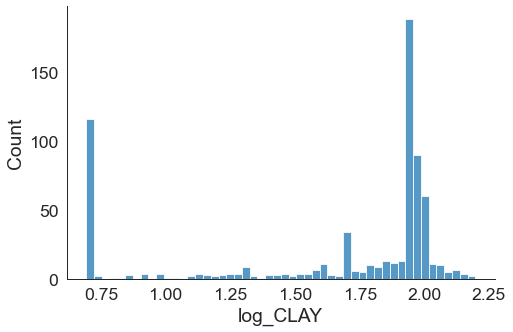

In [65]:
# plotting histogram for density of parcels
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df_FULL_STR_clay['log_CLAY'], kind="hist", bins = 50, aspect = 1.5)

C:\Users\Mahsa\Anaconda3\envs\oxe\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


,sumsquare_error,aic,bic,kl_div
gamma,inf,inf,inf,inf
burr,inf,inf,inf,inf
beta,inf,inf,inf,inf
lognorm,inf,inf,inf,inf
norm,NaN,NaN,NaN,NaN


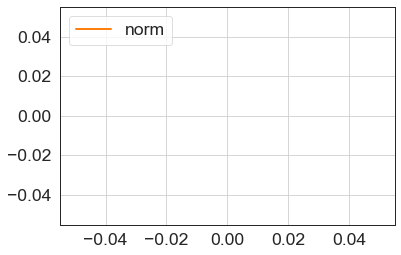

In [66]:
f = Fitter(df_FULL_STR_clay['log_CLAY'],
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [67]:
df_FULL_STR_clay_without_outliers=df_FULL_STR_clay[df_FULL_STR_clay['log_CLAY'] > 0.75] 

In [68]:
df_FULL_STR_clay_without_outliers

,FULL_STR,CLAY,log_CLAY
0,VINNIE WAY,4.990000,1.607436
1,S QUINSIGAMOND AVE,2.529885,0.928174
3,RAWSON HILL DR,6.385000,1.853951
5,SPRING ST,7.415476,2.003569
6,OLDE COLONY DR,6.761905,1.911305
...,...,...,...
684,AFRA DR,7.000000,1.945910
685,SAJDA DR,7.000000,1.945910
687,DEAN DR,7.000000,1.945910
688,PAYTON PL,6.000000,1.791759


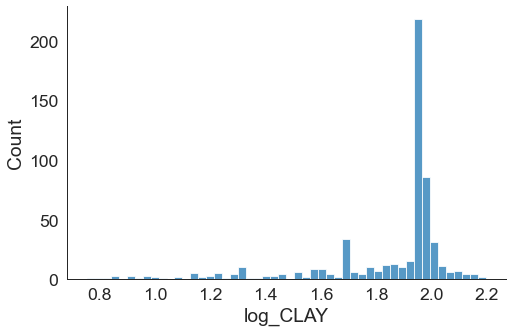

In [69]:
# plotting histogram for density of parcels
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df_FULL_STR_clay_without_outliers['log_CLAY'], kind="hist", bins = 50, aspect = 1.5)

,sumsquare_error,aic,bic,kl_div
burr,365.865031,340.302794,-230.215655,inf
lognorm,453.881507,374.831618,-113.257799,inf
norm,453.957565,369.387538,-119.511094,inf
gamma,459.528443,358.352625,-106.185206,inf
beta,549.643644,159.928116,2.591578,inf


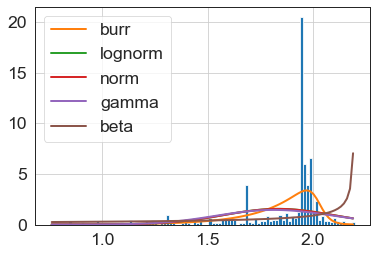

In [70]:
f = Fitter(df_FULL_STR_clay_without_outliers['log_CLAY'],
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [92]:
len(df_Shrewsbury_clay['CLAY'].unique())

11

In [85]:
# In sample SSSU level (sample survey unit), we have a multinomial distribution with 11 possible values.

In [91]:
len(df_FULL_STR_clay['log_CLAY'].unique())

331

In [93]:
# In street level, we have a continuios distribution because we used mean for all SSUs that exist in each street.